# Healthcare Analytics Project


## Data Preparation

In [5]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
icd_data = pd.read_csv('/content/drive/MyDrive/Python Project Data/icd11 codes.csv')
icd_data.head(5)

,Code,Title
0,1A00,Cholera
1,1A01,Intestinal infection due to other Vibrio
2,1A02,Intestinal infections due to Shigella
3,1A03,Intestinal infections due to Escherichia...
4,1A03.0,Enteropathogenic Escherichia coli infe...


In [8]:
icd10_data = pd.read_csv('/content/drive/MyDrive/Python Project Data/icd10.csv')
icd10_data.head(5)

,Id,Code,CodeWithSeparator,ShortDescription,LongDescription,HippaCovered,Deleted
0,1,A00,A00,Cholera,Cholera,0,0
1,2,A000,A00.0,"Cholera due to Vibrio cholerae 01, biovar chol...","Cholera due to Vibrio cholerae 01, biovar chol...",1,0
2,3,A001,A00.1,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",1,0
3,4,A009,A00.9,"Cholera, unspecified","Cholera, unspecified",1,0
4,5,A01,A01,Typhoid and paratyphoid fevers,Typhoid and paratyphoid fevers,0,0


In [9]:
claims_data = pd.read_csv('/content/drive/MyDrive/Python Project Data/claims_data.csv')
claims_data.head()

,Claim ID,Provider ID,Patient ID,Date of Service,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,Claim Status,Reason Code,Follow-up Required,AR Status,Outcome
0,0HO1FSN4AP,126528997,7936697103,8/7/2024,304,99231,A02.1,218,203,Self-Pay,Paid,Incorrect billing information,Yes,Pending,Partially Paid
1,9U86CI2P5A,6986719948,1547160031,6/21/2024,348,99213,A16.5,216,206,Medicare,Paid,Pre-existing condition,Yes,Open,Denied
2,1QEU1AIDAU,1355108115,2611585318,7/4/2024,235,99213,A00.1,148,119,Commercial,Under Review,Duplicate claim,No,Denied,Denied
3,WH7XDS8CEO,9991055906,7167948632,5/26/2024,112,99215,A18.6,79,69,Medicare,Denied,Authorization not obtained,No,Partially Paid,Denied
4,M6OJEZ8KGI,7382167012,2140226267,7/16/2024,406,99238,A17.9,320,259,Medicare,Denied,Authorization not obtained,No,On Hold,Denied


In [10]:
icd10_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94765 entries, 0 to 94764
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 94765 non-null  int64 
 1   Code               94765 non-null  object
 2   CodeWithSeparator  94765 non-null  object
 3   ShortDescription   94765 non-null  object
 4   LongDescription    94765 non-null  object
 5   HippaCovered       94765 non-null  int64 
 6   Deleted            94765 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.1+ MB


In [11]:
icd10_data.describe()

,Id,HippaCovered,Deleted
count,94765.000000,94765.000000,94765.000000
mean,47383.000000,0.761716,0.002385
std,27356.443467,0.426036,0.048777
min,1.000000,0.000000,0.000000
25%,23692.000000,1.000000,0.000000
50%,47383.000000,1.000000,0.000000
75%,71074.000000,1.000000,0.000000
max,94765.000000,1.000000,1.000000


In [12]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Claim ID            1000 non-null   object
 1   Provider ID         1000 non-null   int64 
 2   Patient ID          1000 non-null   int64 
 3   Date of Service     1000 non-null   object
 4   Billed Amount       1000 non-null   int64 
 5   Procedure Code      1000 non-null   int64 
 6   Diagnosis Code      1000 non-null   object
 7   Allowed Amount      1000 non-null   int64 
 8   Paid Amount         1000 non-null   int64 
 9   Insurance Type      1000 non-null   object
 10  Claim Status        1000 non-null   object
 11  Reason Code         1000 non-null   object
 12  Follow-up Required  1000 non-null   object
 13  AR Status           1000 non-null   object
 14  Outcome             1000 non-null   object
dtypes: int64(6), object(9)
memory usage: 117.3+ KB


In [13]:
claims_data.describe()

,Provider ID,Patient ID,Billed Amount,Procedure Code,Allowed Amount,Paid Amount
count,1.000000e+03,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000
mean,4.909473e+09,5.112327e+09,297.19100,99223.969000,223.112000,200.754000
std,2.866473e+09,2.919255e+09,116.36365,8.390736,90.784731,83.353688
min,5.364682e+06,9.455298e+06,100.00000,99213.000000,64.000000,53.000000
25%,2.460360e+09,2.600572e+09,197.00000,99215.000000,147.750000,133.000000
50%,5.002762e+09,5.216802e+09,297.00000,99222.000000,225.000000,200.000000
75%,7.313899e+09,7.753702e+09,395.00000,99232.000000,289.000000,262.000000
max,9.991056e+09,9.964057e+09,500.00000,99238.000000,442.000000,423.000000


In [14]:
claims_left_join = claims_data.merge(icd10_data, left_on="Diagnosis Code", right_on="CodeWithSeparator", how="left")
claims_left_join

,Claim ID,Provider ID,Patient ID,Date of Service,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,...,Follow-up Required,AR Status,Outcome,Id,Code,CodeWithSeparator,ShortDescription,LongDescription,HippaCovered,Deleted
0,0HO1FSN4AP,126528997,7936697103,8/7/2024,304,99231,A02.1,218,203,Self-Pay,...,Yes,Pending,Partially Paid,20.0,A021,A02.1,Salmonella sepsis,Salmonella sepsis,1.0,0.0
1,9U86CI2P5A,6986719948,1547160031,6/21/2024,348,99213,A16.5,216,206,Medicare,...,Yes,Open,Denied,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1QEU1AIDAU,1355108115,2611585318,7/4/2024,235,99213,A00.1,148,119,Commercial,...,No,Denied,Denied,3.0,A001,A00.1,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",1.0,0.0
3,WH7XDS8CEO,9991055906,7167948632,5/26/2024,112,99215,A18.6,79,69,Medicare,...,No,Partially Paid,Denied,141.0,A186,A18.6,Tuberculosis of (inner) (middle) ear,Tuberculosis of (inner) (middle) ear,1.0,0.0
4,M6OJEZ8KGI,7382167012,2140226267,7/16/2024,406,99238,A17.9,320,259,Medicare,...,No,On Hold,Denied,111.0,A179,A17.9,"Tuberculosis of nervous system, unspecified","Tuberculosis of nervous system, unspecified",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0B0TP89BQF,7640195037,6836887959,5/30/2024,307,99238,A08.8,231,213,Commercial,...,No,Pending,Partially Paid,93.0,A088,A08.8,Other specified intestinal infections,Other specified intestinal infections,1.0,0.0
996,VVROAPZFFA,3378390045,8592277150,6/23/2024,150,99215,A02.8,105,99,Medicare,...,Yes,Closed,Partially Paid,29.0,A028,A02.8,Other specified salmonella infections,Other specified salmonella infections,1.0,0.0
997,Q9J55DIMLR,2766789913,9757787667,7/7/2024,128,99213,A02.2,83,75,Medicare,...,Yes,Partially Paid,Paid,21.0,A022,A02.2,Localized salmonella infections,Localized salmonella infections,0.0,0.0
998,531HVTDM18,1335890669,1995402912,5/14/2024,178,99215,A08.2,122,103,Medicaid,...,Yes,On Hold,Denied,87.0,A082,A08.2,Adenoviral enteritis,Adenoviral enteritis,1.0,0.0


## Data Analysis

In [15]:
# Filter matched claims only
claims_matched = claims_left_join[claims_left_join["CodeWithSeparator"].notna()]

# Top 10 diagnoses by frequency
top_diagnoses = (
    claims_matched["Diagnosis Code"]
    .value_counts()
    .reset_index()
)
top_diagnoses.columns = ["Diagnosis Code", "Claim Count"]

top_diagnoses = top_diagnoses.merge(
    icd10_data[["CodeWithSeparator", "ShortDescription"]],
    left_on="Diagnosis Code",
    right_on="CodeWithSeparator",
    how="left"
)
print("Top 10 Diagnoses by Frequency:")
print(top_diagnoses.head(10))

# Top 10 diagnoses by total billed amount
billed_by_diagnosis = (
    claims_matched.groupby("Diagnosis Code")["Billed Amount"]
    .mean()
    .reset_index()
    .sort_values(by="Billed Amount", ascending=False)
)
billed_by_diagnosis = billed_by_diagnosis.merge(
    icd10_data[["CodeWithSeparator", "ShortDescription"]],
    left_on="Diagnosis Code",
    right_on="CodeWithSeparator",
    how="left"
)
print("\nTop 10 Diagnoses by Billed Amount:")
print(billed_by_diagnosis.head(10))


Top 10 Diagnoses by Frequency:
  Diagnosis Code  Claim Count CodeWithSeparator  \
0          A05.4           19             A05.4   
1          A06.0           17             A06.0   
2          A01.0           17             A01.0   
3          A06.8           17             A06.8   
4          A18.7           16             A18.7   
5          A02.1           15             A02.1   
6          A17.8           15             A17.8   
7          A18.0           15             A18.0   
8          A19.9           15             A19.9   
9          A19.1           14             A19.1   

                               ShortDescription  
0        Foodborne Bacillus cereus intoxication  
1                        Acute amebic dysentery  
2                                 Typhoid fever  
3               Amebic infection of other sites  
4                Tuberculosis of adrenal glands  
5                             Salmonella sepsis  
6          Other tuberculosis of nervous system  
7      

In [16]:
claims_matched["Claim Status"].value_counts(normalize=True) * 100


,proportion
Claim Status,
Denied,33.930858
Under Review,33.674776
Paid,32.394366


In [17]:
denials = claims_matched[claims_matched["Claim Status"] == "Denied"]
denials["Reason Code"].value_counts()


,count
Reason Code,
Authorization not obtained,42
Pre-existing condition,41
Incorrect billing information,37
Lack of medical necessity,36
Patient eligibility issues,32
Duplicate claim,27
Missing documentation,27
Service not covered,23


In [18]:
claims_matched.groupby("Insurance Type")["Claim Status"].value_counts(normalize=True).unstack().fillna(0) * 100


Claim Status,Denied,Paid,Under Review
Insurance Type,,,
Commercial,36.666667,32.380952,30.952381
Medicaid,28.773585,34.433962,36.792453
Medicare,38.554217,28.915663,32.530120
Self-Pay,32.642487,33.160622,34.196891


In [19]:
# Denial rate by diagnosis
denial_rate = (
    claims_matched.groupby("Diagnosis Code")["Claim Status"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)

denial_rate = denial_rate.merge(
    icd10_data[["CodeWithSeparator", "ShortDescription"]],
    left_on="Diagnosis Code",
    right_on="CodeWithSeparator",
    how="left"
)

# Sort by highest denial %
denial_rate.sort_values(by="Denied", ascending=False).head(10)


,Diagnosis Code,Denied,Paid,Under Review,CodeWithSeparator,ShortDescription
48,A07.1,0.666667,0.222222,0.111111,A07.1,Giardiasis [lambliasis]
23,A04.4,0.600000,0.200000,0.200000,A04.4,Other intestinal Escherichia coli infections
53,A08.0,0.571429,0.285714,0.142857,A08.0,Rotaviral enteritis
14,A03.1,0.555556,0.222222,0.222222,A03.1,Shigellosis due to Shigella flexneri
60,A15.9,0.545455,0.363636,0.090909,A15.9,Respiratory tuberculosis unspecified
73,A18.8,0.545455,0.272727,0.181818,A18.8,Tuberculosis of other specified organs
20,A04.1,0.538462,0.153846,0.307692,A04.1,Enterotoxigenic Escherichia coli infection
22,A04.3,0.500000,0.000000,0.500000,A04.3,Enterohemorrhagic Escherichia coli infection
49,A07.2,0.500000,0.375000,0.125000,A07.2,Cryptosporidiosis
74,A19.0,0.500000,0.400000,0.100000,A19.0,Acute miliary tuberculosis of a single specifi...


In [20]:
claims_matched[claims_matched["Claim Status"] == "Denied"]["Provider ID"] \
    .value_counts().head(10)


,count
Provider ID,
1301050188,1
9991055906,1
7382167012,1
6675789567,1
3512772966,1
3104304757,1
542828755,1
7302133328,1
4538399253,1


In [21]:
claims_matched.groupby("Insurance Type")[["Billed Amount", "Paid Amount"]].mean().assign(
    Gap=lambda df: df["Billed Amount"] - df["Paid Amount"]
).sort_values(by="Gap", ascending=False)


,Billed Amount,Paid Amount,Gap
Insurance Type,,,
Medicaid,302.740566,204.448113,98.292453
Commercial,303.814286,206.457143,97.357143
Self-Pay,296.974093,200.886010,96.088083
Medicare,280.783133,186.698795,94.084337


/tmp/ipython-input-2814963070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_matched["Date of Service"] = pd.to_datetime(claims_matched["Date of Service"])


<Axes: xlabel='Date of Service'>

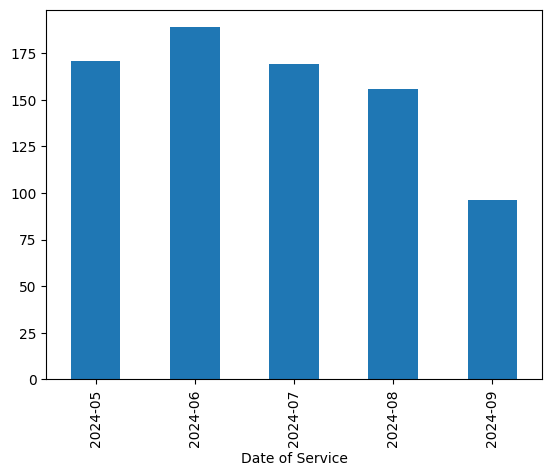

In [22]:
# Convert date column
claims_matched["Date of Service"] = pd.to_datetime(claims_matched["Date of Service"])

# Claims volume over time
claims_matched["Date of Service"].dt.to_period("M").value_counts().sort_index().plot(kind='bar')


In [23]:
# Overall share of each outcome type
claims_matched["Outcome"].value_counts(normalize=True) * 100


,proportion
Outcome,
Paid,34.827145
Denied,33.674776
Partially Paid,31.498079


In [24]:
claims_matched.groupby("Claim Status")["Outcome"].value_counts(normalize=True).unstack().fillna(0) * 100


Outcome,Denied,Paid,Partially Paid
Claim Status,,,
Denied,33.584906,34.716981,31.698113
Paid,31.620553,35.573123,32.806324
Under Review,35.741445,34.220532,30.038023


In [25]:
claims_matched.groupby("Insurance Type")["Outcome"].value_counts(normalize=True).unstack().fillna(0) * 100


Outcome,Denied,Paid,Partially Paid
Insurance Type,,,
Commercial,35.238095,36.666667,28.095238
Medicaid,30.188679,36.792453,33.018868
Medicare,34.939759,36.144578,28.915663
Self-Pay,34.715026,29.533679,35.751295


In [26]:
claims_matched.groupby("Outcome")["Paid Amount"].mean().sort_values(ascending=False)


,Paid Amount
Outcome,
Partially Paid,202.776423
Paid,199.871324
Denied,198.532319


In [29]:
# Top diagnoses with Partially Paid
claims_matched[claims_matched["Outcome"] == "Partially Paid"]["Diagnosis Code"].value_counts().head(10)
# Top diagnoses with Denied outcome
claims_matched[claims_matched["Outcome"] == "Denied"]["Diagnosis Code"].value_counts().head(10)


,count
Diagnosis Code,
A01.0,10
A06.0,7
A05.8,7
A03.9,7
A08.2,6
A06.9,6
A18.7,6
A18.3,5
A04.7,5


In [30]:
# Partially Paid Diagnoses
partial = claims_matched[claims_matched["Outcome"] == "Partially Paid"]

top_partial = (
    partial["Diagnosis Code"]
    .value_counts()
    .reset_index()
)

top_partial.columns = ["Diagnosis Code", "Count"]

top_partial = top_partial.merge(
    icd10_data[["CodeWithSeparator", "ShortDescription"]],
    left_on="Diagnosis Code",
    right_on="CodeWithSeparator",
    how="left"
)

print("Top Diagnoses for Partially Paid Outcomes:")
print(top_partial[["Diagnosis Code", "ShortDescription", "Count"]].head(10))

# Denied Diagnoses
denied = claims_matched[claims_matched["Outcome"] == "Denied"]

top_denied = (
    denied["Diagnosis Code"]
    .value_counts()
    .reset_index()
)

top_denied.columns = ["Diagnosis Code", "Count"]

top_denied = top_denied.merge(
    icd10_data[["CodeWithSeparator", "ShortDescription"]],
    left_on="Diagnosis Code",
    right_on="CodeWithSeparator",
    how="left"
)

print("\nTop Diagnoses for Denied Outcomes:")
print(top_denied[["Diagnosis Code", "ShortDescription", "Count"]].head(10))


Top Diagnoses for Partially Paid Outcomes:
  Diagnosis Code                                   ShortDescription  Count
0          A02.1                                  Salmonella sepsis      8
1          A06.8                    Amebic infection of other sites      8
2          A19.9                  Miliary tuberculosis, unspecified      8
3          A01.4                     Paratyphoid fever, unspecified      8
4          A04.5                            Campylobacter enteritis      6
5          A05.4             Foodborne Bacillus cereus intoxication      6
6          A18.0                   Tuberculosis of bones and joints      6
7          A03.2                 Shigellosis due to Shigella boydii      6
8          A08.1  Acute gastrent d/t Norwalk agent and oth small...      6
9          A18.7                     Tuberculosis of adrenal glands      5

Top Diagnoses for Denied Outcomes:
  Diagnosis Code                                   ShortDescription  Count
0          A01.0     

## Machine Learning

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 🧼 Step 1: Feature Selection (adjust as needed)
features = ["Diagnosis Code", "Procedure Code", "Insurance Type", "Billed Amount"]
target = "Outcome"

# Filter clean rows
model_data = claims_matched[features + [target]].dropna()

# ✨ Step 2: Encode Categorical Variables
cat_cols = ["Diagnosis Code", "Procedure Code", "Insurance Type"]
num_cols = ["Billed Amount"]

# One-hot encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_cats = encoder.fit_transform(model_data[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))

# Combine encoded features + numeric
X = pd.concat([encoded_cat_df.reset_index(drop=True), model_data[num_cols].reset_index(drop=True)], axis=1)
y = model_data[target]

# 🧪 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🤖 Step 4: Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 📈 Step 5: Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


                precision    recall  f1-score   support

        Denied       0.34      0.42      0.37        53
          Paid       0.34      0.33      0.33        55
Partially Paid       0.26      0.20      0.23        49

      accuracy                           0.32       157
     macro avg       0.31      0.32      0.31       157
  weighted avg       0.31      0.32      0.31       157

Confusion Matrix:
 [[22 12 19]
 [27 18 10]
 [16 23 10]]


In [32]:
from sklearn.linear_model import LogisticRegression

# Use multinomial logistic regression for multiclass classification
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Evaluate performance
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                precision    recall  f1-score   support

        Denied       0.34      0.34      0.34        53
          Paid       0.42      0.40      0.41        55
Partially Paid       0.37      0.39      0.38        49

      accuracy                           0.38       157
     macro avg       0.38      0.38      0.38       157
  weighted avg       0.38      0.38      0.38       157

Confusion Matrix:
 [[18 16 19]
 [19 22 14]
 [16 14 19]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Statistical Analysis

In [33]:
from scipy.stats import ttest_ind

# Filter groups
denied_bills = claims_matched[claims_matched["Outcome"] == "Denied"]["Billed Amount"]
paid_bills = claims_matched[claims_matched["Outcome"] == "Paid"]["Billed Amount"]

# Run independent two-sample t-test
t_stat, p_val = ttest_ind(denied_bills, paid_bills, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in billed amounts.")
else:
    print("Fail to reject the null: No significant difference in billed amounts.")


T-statistic: -0.9190
P-value: 0.3585
Fail to reject the null: No significant difference in billed amounts.


In [34]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
contingency = pd.crosstab(claims_matched["Insurance Type"], claims_matched["Outcome"])

# Run chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

if p < 0.05:
    print("Reject the null: Insurance type is associated with outcome.")
else:
    print("Fail to reject the null: No significant association found.")


Chi2 Statistic: 5.520646390090755
Degrees of Freedom: 6
P-value: 0.47896482859183076
Fail to reject the null: No significant association found.
